# Otto Kaggle Competition Exploratory Data Analysis (2015)

## March 4, 2018

## Hiro Miyake

This notebook deals with data provided in the [Otto Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge) held in 2015. Modeling is performed in the companion notebook.

# 1. Load modules and data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

#from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# 2. Overview of data

In [3]:
print train.shape
train.head()

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
print test.shape
test.head()

(144368, 94)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

We see that there are 94 independent variables (including the `id` variable). Every column except the target column is an integer.

In [6]:
print 'Total number of numerical columns: ' + str(len(train.describe().columns))
train.describe()

Total number of numerical columns: 94


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


# 3. Target variable characteristics

The target variable is given by the `target` column in the training dataset.

In [7]:
print 'Number of unique target values: ' + str(len(train['target'].unique()))

Number of unique target values: 9


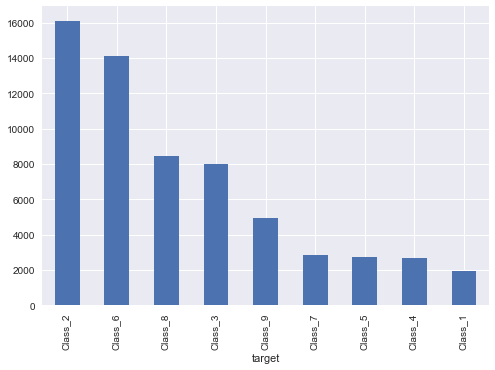

In [8]:
train['target'].value_counts().plot(kind='bar')
plt.xlabel('target')
plt.show()

We see that the outcomes are not evenly distributed, but is not ridiculously skewed either.

# 4. Independent variable properties

Combine the training and test data.

In [9]:
data = pd.concat([train.drop('target', axis = 1), test], axis = 0)

## Note that in the above concatenation step, the indices are unchanged
## To reset the indices so that they make sense, take the tip from the following link
## and use the following line of code
## https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects
data.reset_index(inplace=True, drop=True)

data.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,22,0,1,2,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,6,2,1,0,0,7,0,0,0,0,...,1,0,3,0,0,0,0,2,0,0
6,7,2,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,0,0,1
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,4,0,...,0,0,2,0,0,0,0,0,0,1
9,10,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


There are 93 quantitative variables. Let's look at the histogram of each of them.

Plotting all 93 histograms takes a long time so below I look at just the first 4 columns.

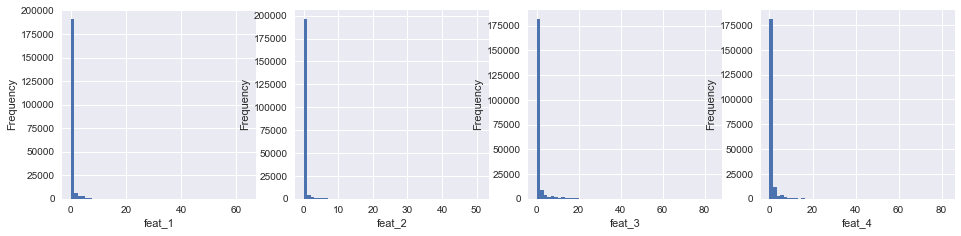

In [10]:
j = 1
figwidth = 16
figheight = 16
plt.rcParams["figure.figsize"] = [figwidth, figheight]
for i in data:
    if i != 'id':
        #print i
        if j > 4:
            break
        plt.subplot(4,4,j) ## plt.subplot(nrows, ncols, index, **kwargs)
        data[i].plot(kind='hist', bins = 50)
        #data_cat[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        j += 1
plt.show()

You see that the values are most of the time zero.

# 5. Beyond univariate EDA

Now that we have some idea of what each of the individual values take on, the next step could be to look for correlations between different columns. But we the univariate EDA already gives us a starting point to make predictions.